## This script reads CESM2 Precipitation data downloaded from Casper in NCAR (Fig S3)

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import datetime
import xarray as xr
import seaborn as sns
import warnings
from matplotlib import pyplot as plt 
import matplotlib as mpl
import shapefile as shp
import cartopy.io.shapereader as shpreader
from numpy import linspace
from numpy import meshgrid
import matplotlib.colors as colors
from numpy import array, ma
import cartopy.crs as ccrs
import matplotlib.cm as cm
import cartopy.feature as cfeature

## Read Lat, Lon data for the selected Domain processed from "GLADE" in Casper

## Lat

In [2]:
file_LatUs = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/precip/mon/latsUsArr.npy'
lats_US = np.load(file_LatUs)
print(lats_US.shape)
print(lats_US)

latUs_cesm2 = lats_US

(32,)
[24.973822 25.916231 26.858639 27.801046 28.743456 29.685863 30.628273
 31.57068  32.51309  33.455498 34.397907 35.340313 36.282722 37.225132
 38.167538 39.109947 40.052357 40.994766 41.937172 42.87958  43.82199
 44.764397 45.706806 46.649216 47.59162  48.53403  49.47644  50.41885
 51.361256 52.303665 53.246075 54.18848 ]


## Lon

In [3]:
file_LonUs = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/precip/mon/lonsUsArr.npy'
lons_US = np.load(file_LonUs)
print(lons_US.shape)
print(lons_US)

lonUs_cesm2 = lons_US

(56,)
[230.   231.25 232.5  233.75 235.   236.25 237.5  238.75 240.   241.25
 242.5  243.75 245.   246.25 247.5  248.75 250.   251.25 252.5  253.75
 255.   256.25 257.5  258.75 260.   261.25 262.5  263.75 265.   266.25
 267.5  268.75 270.   271.25 272.5  273.75 275.   276.25 277.5  278.75
 280.   281.25 282.5  283.75 285.   286.25 287.5  288.75 290.   291.25
 292.5  293.75 295.   296.25 297.5  298.75]


## Using data from Ensemble Members

### Historical (1850-2014): 1980 months

In [4]:
file_hist_ensMean = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/precip/mon/monPrecipUsHistEnsMean.npy'
file_hist_ensMean_loaded = np.load(file_hist_ensMean)
print(file_hist_ensMean_loaded.shape)

(1980, 32, 56)


## Historical years and 3 time periods (i.e., Era) in Scenario years

In [5]:
nMonsPerYr = 12     
print(nMonsPerYr)

12


In [6]:
histYrSt = 1850
histYrSelSt = 1930

refPeriodYrSt = 1971
refPeriodYrEnd = 2000

scenYrSt = 2015
scenEraTwoYrSt = 2045
scenEraThreeYrSt = 2075

scenYrEnd = 2100
#

In [7]:
refPeriodStepSt = (histYrSelSt - histYrSt)*nMonsPerYr
print(refPeriodStepSt)

960


In [8]:
file_histSel_ensMean_loaded = file_hist_ensMean_loaded[refPeriodStepSt::, :, :]
print(file_histSel_ensMean_loaded.shape)

(1020, 32, 56)


### Scenario (2105-2100): 1032 months

In [9]:
file_scen_ensMean = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/precip/mon/monPrecipUsScenEnsMean.npy'
file_scen_ensMean_loaded = np.load(file_scen_ensMean)
print(file_scen_ensMean_loaded.shape)

(1032, 32, 56)


## Concatenate two data arrays

In [10]:
param_histSel_scen_ensMean_Us = np.concatenate((file_histSel_ensMean_loaded, file_scen_ensMean_loaded), axis=0)
print(param_histSel_scen_ensMean_Us.shape)

(2052, 32, 56)


## Writing in an Xarray Data array

In [11]:
print(param_histSel_scen_ensMean_Us.shape)

(2052, 32, 56)


In [12]:
t_histSel_scen, y_Us, x_Us = param_histSel_scen_ensMean_Us.shape

print(t_histSel_scen)
print(y_Us)
print(x_Us)

2052
32
56


In [13]:
Month_steps = [x for x in range(t_histSel_scen)]
#print(Month_steps)

In [14]:
param_histSel_scen_ensMean_Us_xarray = xr.DataArray(param_histSel_scen_ensMean_Us, coords=[Month_steps, latUs_cesm2, lonUs_cesm2], dims=["Month_steps","Lat","Lon"])

print(param_histSel_scen_ensMean_Us_xarray.shape)
#print(param_histSel_scen_ensMean_Us_xarray)

(2052, 32, 56)


## Masking files for the US Domain only

### Mississippi

In [15]:
MaskFile_Missi_to_load = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mask/mrb_us/mask_missiWri_us_CESM_longThree.nc'
print(MaskFile_Missi_to_load)

C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mask/mrb_us/mask_missiWri_us_CESM_longThree.nc


In [16]:
MaskFile_Missi = xr.open_dataset(MaskFile_Missi_to_load)['Mask']
print(MaskFile_Missi)

<xarray.DataArray 'Mask' (Lat: 32, Lon: 56)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


C:\Users\muham\anaconda3\lib\site-packages\xarray\backends\plugins.py:61: RuntimeWarning: Engine 'rasterio' loading failed:
DLL load failed while importing _base: The specified procedure could not be found.
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [17]:
param_masked_Missi = param_histSel_scen_ensMean_Us_xarray.where(MaskFile_Missi>0)
print(param_masked_Missi.shape)
#print(param_masked_Missi)

(2052, 32, 56)


## Missouri

In [18]:
MaskFile_Missouri_to_load = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mask/mrb_us/mask_missouri_us_CESM_longThree.nc'
print(MaskFile_Missouri_to_load)

C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mask/mrb_us/mask_missouri_us_CESM_longThree.nc


In [19]:
MaskFile_Missouri = xr.open_dataset(MaskFile_Missouri_to_load)['Mask']
print(MaskFile_Missouri)

<xarray.DataArray 'Mask' (Lat: 32, Lon: 56)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [20]:
param_masked_Missouri = param_histSel_scen_ensMean_Us_xarray.where(MaskFile_Missouri>0)
print(param_masked_Missouri.shape)
#print(param_masked_Missouri)

(2052, 32, 56)


## Arkansas

In [21]:
MaskFile_Arkansas_to_load = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mask/mrb_us/mask_arkansas_us_CESM_longThree.nc'
print(MaskFile_Arkansas_to_load)

C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mask/mrb_us/mask_arkansas_us_CESM_longThree.nc


In [22]:
MaskFile_Arkansas = xr.open_dataset(MaskFile_Arkansas_to_load)['Mask']
print(MaskFile_Arkansas)

<xarray.DataArray 'Mask' (Lat: 32, Lon: 56)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [23]:
param_masked_Arkansas = param_histSel_scen_ensMean_Us_xarray.where(MaskFile_Arkansas>0)
print(param_masked_Arkansas.shape)
#print(param_masked_Arkansas)

(2052, 32, 56)


## Ohio

In [24]:
MaskFile_Ohio_to_load = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mask/mrb_us/mask_ohio_us_CESM_longThree.nc'
print(MaskFile_Ohio_to_load)

C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mask/mrb_us/mask_ohio_us_CESM_longThree.nc


In [25]:
MaskFile_Ohio = xr.open_dataset(MaskFile_Ohio_to_load)['Mask']
print(MaskFile_Ohio)

<xarray.DataArray 'Mask' (Lat: 32, Lon: 56)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [26]:
param_masked_Ohio = param_histSel_scen_ensMean_Us_xarray.where(MaskFile_Ohio>0)
print(param_masked_Ohio.shape)
#print(param_masked_Ohio)

(2052, 32, 56)


## Masking for Lower Mississippi Basin

In [27]:
param_masked_lowMissi = param_histSel_scen_ensMean_Us_xarray.sel(Lat=slice(30.,37.), Lon = slice(268., 271.))
print(param_masked_lowMissi.shape)

(2052, 7, 2)


## The masked rasters for different basins

In [28]:
print(param_masked_Missi.shape)
print(param_masked_Missouri.shape)
print(param_masked_Arkansas.shape)
print(param_masked_Ohio.shape)
print('')
print(param_masked_lowMissi.shape)

(2052, 32, 56)
(2052, 32, 56)
(2052, 32, 56)
(2052, 32, 56)

(2052, 7, 2)


## Time series for basin-average Param value: Monthly resolution

In [29]:
param_masked_ensMean_basinAvg_Missi = np.nanmean(param_masked_Missi, axis=(1,2))
print(param_masked_ensMean_basinAvg_Missi.shape)

(2052,)


In [30]:
param_masked_ensMean_basinAvg_Missouri = np.nanmean(param_masked_Missouri, axis=(1,2))
print(param_masked_ensMean_basinAvg_Missouri.shape)

(2052,)


In [31]:
param_masked_ensMean_basinAvg_Arkansas = np.nanmean(param_masked_Arkansas, axis=(1,2))
print(param_masked_ensMean_basinAvg_Arkansas.shape)

(2052,)


In [32]:
param_masked_ensMean_basinAvg_Ohio = np.nanmean(param_masked_Ohio, axis=(1,2))
print(param_masked_ensMean_basinAvg_Ohio.shape)

(2052,)


In [33]:
param_masked_ensMean_basinAvg_lowMissi = np.nanmean(param_masked_lowMissi, axis=(1,2))
print(param_masked_ensMean_basinAvg_lowMissi.shape)

(2052,)


In [34]:
t_histSel_scen = param_masked_ensMean_basinAvg_Missi.shape[0]
print(t_histSel_scen)

2052


In [35]:
Month_steps = [x for x in range(t_histSel_scen)]

## For Seasonal Values

In [36]:
def Season(value):
    if value <= 2:
        return "Winter"
    if 3 <= value <= 5:
        return "Spring"
    elif 6 <= value <= 8:
        return "Summer"
    elif 9 <= value <= 11:
        return "Fall"
    elif value == 12:
        return "Winter"

In [37]:
dates_histSelScen = xr.cftime_range(start='193001',freq='1M', periods=2052, calendar='noleap').strftime('%Y-%m').to_list()
print(dates_histSelScen[:3], dates_histSelScen[-1])


['1930-01', '1930-02', '1930-03'] 2100-12


# Missouri basin

In [38]:
print(param_masked_ensMean_basinAvg_Missouri.shape)

(2052,)


In [39]:

param_masked_ensMean_basinAvg_Missouri_xarray = xr.DataArray(param_masked_ensMean_basinAvg_Missouri, coords=[Month_steps], dims=["Month_steps"])
print(param_masked_ensMean_basinAvg_Missouri_xarray.shape)
print(param_masked_ensMean_basinAvg_Missouri_xarray)

#df['Day_steps'] = dates_histSelScen
param_masked_ensMean_basinAvg_Missouri_xarray['Month_steps'] = pd.to_datetime(dates_histSelScen)
print(param_masked_ensMean_basinAvg_Missouri_xarray.shape)
print(param_masked_ensMean_basinAvg_Missouri_xarray.head(3))

#df = disch_histSel_Scen_ensMean_vicks_xarray.to_dataframe(name='Discharge').unstack().reset_index()
df_param_Missouri = param_masked_ensMean_basinAvg_Missouri_xarray.to_dataframe(name='Precipitation').reset_index()
print(df_param_Missouri.shape)
print(df_param_Missouri.head(3))

df_param_Missouri['Season_year'] = df_param_Missouri.Month_steps.dt.year.where(df_param_Missouri.Month_steps.dt.month < 12, df_param_Missouri.Month_steps.dt.year + 1)
print(df_param_Missouri.shape)
print(df_param_Missouri.head(15))


df_param_Missouri['Season_mon'] = df_param_Missouri.Month_steps.dt.month.where(df_param_Missouri.Month_steps.dt.month == 1, df_param_Missouri.Month_steps.dt.month)
print(df_param_Missouri.shape)
print(df_param_Missouri.head(15))


df_param_Missouri['Season'] = df_param_Missouri['Season_mon'].map(Season)
#display(df_param_Missouri.head())
print(df_param_Missouri.shape)
print(df_param_Missouri.head(15))

df_param_winter_Missouri_withOneExtra = df_param_Missouri[df_param_Missouri["Season"] == 'Winter'].groupby('Season_year').mean('Season_year')
print(df_param_winter_Missouri_withOneExtra.shape)
print(df_param_winter_Missouri_withOneExtra)

## to Delete the last (unwanted) row
df_param_winter_Missouri = df_param_winter_Missouri_withOneExtra.iloc[:-1 , :]
print(df_param_winter_Missouri.shape)
print(df_param_winter_Missouri.tail())

df_param_spring_Missouri = df_param_Missouri[df_param_Missouri["Season"] == 'Spring'].groupby('Season_year').mean('Season_year')
print(df_param_spring_Missouri.shape)
print(df_param_spring_Missouri)

df_param_summer_Missouri = df_param_Missouri[df_param_Missouri["Season"] == 'Summer'].groupby('Season_year').mean('Season_year')
print(df_param_summer_Missouri.shape)
print(df_param_summer_Missouri)

df_param_fall_Missouri = df_param_Missouri[df_param_Missouri["Season"] == 'Fall'].groupby('Season_year').mean('Season_year')
print(df_param_fall_Missouri.shape)
print(df_param_fall_Missouri)

param_winter_Missouri = df_param_winter_Missouri['Precipitation']
print(param_winter_Missouri.shape)
print(param_winter_Missouri)

param_spring_Missouri = df_param_spring_Missouri['Precipitation']
print(param_spring_Missouri.shape)
print(param_spring_Missouri)

param_summer_Missouri = df_param_summer_Missouri['Precipitation']
print(param_summer_Missouri.shape)
print(param_summer_Missouri)

param_fall_Missouri = df_param_fall_Missouri['Precipitation']
print(param_fall_Missouri.shape)
print(param_fall_Missouri)



(2052,)
<xarray.DataArray (Month_steps: 2052)>
array([27.34115757, 27.44920615, 33.53488854, ..., 34.78054992,
       39.22076002, 35.3271365 ])
Coordinates:
  * Month_steps  (Month_steps) int32 0 1 2 3 4 5 ... 2047 2048 2049 2050 2051
(2052,)
<xarray.DataArray (Month_steps: 3)>
array([27.34115757, 27.44920615, 33.53488854])
Coordinates:
  * Month_steps  (Month_steps) datetime64[ns] 1930-01-01 1930-02-01 1930-03-01
(2052, 2)
  Month_steps  Precipitation
0  1930-01-01      27.341158
1  1930-02-01      27.449206
2  1930-03-01      33.534889
(2052, 3)
   Month_steps  Precipitation  Season_year
0   1930-01-01      27.341158         1930
1   1930-02-01      27.449206         1930
2   1930-03-01      33.534889         1930
3   1930-04-01      50.629739         1930
4   1930-05-01      64.765370         1930
5   1930-06-01      71.543510         1930
6   1930-07-01      44.928425         1930
7   1930-08-01      35.005902         1930
8   1930-09-01      35.427498         1930
9   1930-10-01 

## Arkansas basin

In [40]:
print(param_masked_ensMean_basinAvg_Arkansas.shape)

(2052,)


In [41]:
param_masked_ensMean_basinAvg_Arkansas_xarray = xr.DataArray(param_masked_ensMean_basinAvg_Arkansas, coords=[Month_steps], dims=["Month_steps"])
print(param_masked_ensMean_basinAvg_Arkansas_xarray.shape)
print(param_masked_ensMean_basinAvg_Arkansas_xarray)

#df['Day_steps'] = dates_histSelScen
param_masked_ensMean_basinAvg_Arkansas_xarray['Month_steps'] = pd.to_datetime(dates_histSelScen)
print(param_masked_ensMean_basinAvg_Arkansas_xarray.shape)
print(param_masked_ensMean_basinAvg_Arkansas_xarray.head(3))

#df = disch_histSel_Scen_ensMean_vicks_xarray.to_dataframe(name='Discharge').unstack().reset_index()
df_param_Arkansas = param_masked_ensMean_basinAvg_Arkansas_xarray.to_dataframe(name='Precipitation').reset_index()
print(df_param_Arkansas.shape)
print(df_param_Arkansas.head(3))

df_param_Arkansas['Season_year'] = df_param_Arkansas.Month_steps.dt.year.where(df_param_Arkansas.Month_steps.dt.month < 12, df_param_Arkansas.Month_steps.dt.year + 1)
print(df_param_Arkansas.shape)
print(df_param_Arkansas.head(15))




df_param_Arkansas['Season_mon'] = df_param_Arkansas.Month_steps.dt.month.where(df_param_Arkansas.Month_steps.dt.month == 1, df_param_Arkansas.Month_steps.dt.month)
print(df_param_Arkansas.shape)
print(df_param_Arkansas.head(15))

df_param_Arkansas['Season'] = df_param_Arkansas['Season_mon'].map(Season)
#display(df_param_Arkansas.head())
print(df_param_Arkansas.shape)
print(df_param_Arkansas.head(15))

df_param_winter_Arkansas_withOneExtra = df_param_Arkansas[df_param_Arkansas["Season"] == 'Winter'].groupby('Season_year').mean('Season_year')
print(df_param_winter_Arkansas_withOneExtra.shape)
print(df_param_winter_Arkansas_withOneExtra)

## to Delete the last (unwanted) row
df_param_winter_Arkansas = df_param_winter_Arkansas_withOneExtra.iloc[:-1 , :]
print(df_param_winter_Arkansas.shape)
print(df_param_winter_Arkansas.tail())
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## Split into Seasons
df_param_spring_Arkansas = df_param_Arkansas[df_param_Arkansas["Season"] == 'Spring'].groupby('Season_year').mean('Season_year')
print(df_param_spring_Arkansas.shape)
print(df_param_spring_Arkansas)

df_param_summer_Arkansas = df_param_Arkansas[df_param_Arkansas["Season"] == 'Summer'].groupby('Season_year').mean('Season_year')
print(df_param_summer_Arkansas.shape)
print(df_param_summer_Arkansas)

df_param_fall_Arkansas = df_param_Arkansas[df_param_Arkansas["Season"] == 'Fall'].groupby('Season_year').mean('Season_year')
print(df_param_fall_Arkansas.shape)
print(df_param_fall_Arkansas)

param_winter_Arkansas = df_param_winter_Arkansas['Precipitation']
print(param_winter_Arkansas.shape)
print(param_winter_Arkansas)

param_spring_Arkansas = df_param_spring_Arkansas['Precipitation']
print(param_spring_Arkansas.shape)
print(param_spring_Arkansas)

param_summer_Arkansas = df_param_summer_Arkansas['Precipitation']
print(param_summer_Arkansas.shape)
print(param_summer_Arkansas)

param_fall_Arkansas = df_param_fall_Arkansas['Precipitation']
print(param_fall_Arkansas.shape)
print(param_fall_Arkansas)


(2052,)
<xarray.DataArray (Month_steps: 2052)>
array([45.77816042, 52.8953356 , 55.01010673, ..., 47.09226295,
       53.07093668, 52.98572102])
Coordinates:
  * Month_steps  (Month_steps) int32 0 1 2 3 4 5 ... 2047 2048 2049 2050 2051
(2052,)
<xarray.DataArray (Month_steps: 3)>
array([45.77816042, 52.8953356 , 55.01010673])
Coordinates:
  * Month_steps  (Month_steps) datetime64[ns] 1930-01-01 1930-02-01 1930-03-01
(2052, 2)
  Month_steps  Precipitation
0  1930-01-01      45.778160
1  1930-02-01      52.895336
2  1930-03-01      55.010107
(2052, 3)
   Month_steps  Precipitation  Season_year
0   1930-01-01      45.778160         1930
1   1930-02-01      52.895336         1930
2   1930-03-01      55.010107         1930
3   1930-04-01      68.627994         1930
4   1930-05-01      83.342169         1930
5   1930-06-01      68.950529         1930
6   1930-07-01      33.483012         1930
7   1930-08-01      32.930304         1930
8   1930-09-01      55.646627         1930
9   1930-10-01 

# Ohio basin

In [42]:
print(param_masked_ensMean_basinAvg_Ohio.shape)

(2052,)


In [43]:

param_masked_ensMean_basinAvg_Ohio_xarray = xr.DataArray(param_masked_ensMean_basinAvg_Ohio, coords=[Month_steps], dims=["Month_steps"])
print(param_masked_ensMean_basinAvg_Ohio_xarray.shape)
print(param_masked_ensMean_basinAvg_Ohio_xarray)

#df['Day_steps'] = dates_histSelScen
param_masked_ensMean_basinAvg_Ohio_xarray['Month_steps'] = pd.to_datetime(dates_histSelScen)
print(param_masked_ensMean_basinAvg_Ohio_xarray.shape)
print(param_masked_ensMean_basinAvg_Ohio_xarray.head(3))

#df = disch_histSel_Scen_ensMean_vicks_xarray.to_dataframe(name='Discharge').unstack().reset_index()
df_param_Ohio = param_masked_ensMean_basinAvg_Ohio_xarray.to_dataframe(name='Precipitation').reset_index()
print(df_param_Ohio.shape)
print(df_param_Ohio.head(3))

df_param_Ohio['Season_year'] = df_param_Ohio.Month_steps.dt.year.where(df_param_Ohio.Month_steps.dt.month < 12, df_param_Ohio.Month_steps.dt.year + 1)
print(df_param_Ohio.shape)
print(df_param_Ohio.head(15))
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


df_param_Ohio['Season_mon'] = df_param_Ohio.Month_steps.dt.month.where(df_param_Ohio.Month_steps.dt.month == 1, df_param_Ohio.Month_steps.dt.month)
print(df_param_Ohio.shape)
print(df_param_Ohio.head(15))

df_param_Ohio['Season'] = df_param_Ohio['Season_mon'].map(Season)
#display(df_param_Ohio.head())
print(df_param_Ohio.shape)
print(df_param_Ohio.head(15))

df_param_winter_Ohio_withOneExtra = df_param_Ohio[df_param_Ohio["Season"] == 'Winter'].groupby('Season_year').mean('Season_year')
print(df_param_winter_Ohio_withOneExtra.shape)
print(df_param_winter_Ohio_withOneExtra)

## to Delete the last (unwanted) row
df_param_winter_Ohio = df_param_winter_Ohio_withOneExtra.iloc[:-1 , :]
print(df_param_winter_Ohio.shape)
print(df_param_winter_Ohio.tail())
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


## Split into Seasons
df_param_spring_Ohio = df_param_Missouri[df_param_Ohio["Season"] == 'Spring'].groupby('Season_year').mean('Season_year')
print(df_param_spring_Ohio.shape)
print(df_param_spring_Ohio)

df_param_summer_Ohio = df_param_Missouri[df_param_Ohio["Season"] == 'Summer'].groupby('Season_year').mean('Season_year')
print(df_param_summer_Ohio.shape)
print(df_param_summer_Ohio)

df_param_fall_Ohio = df_param_Ohio[df_param_Ohio["Season"] == 'Fall'].groupby('Season_year').mean('Season_year')
print(df_param_fall_Ohio.shape)
print(df_param_fall_Ohio)

param_winter_Ohio = df_param_winter_Ohio['Precipitation']
print(param_winter_Ohio.shape)
print(param_winter_Ohio)

param_spring_Ohio = df_param_spring_Ohio['Precipitation']
print(param_spring_Ohio.shape)
print(param_spring_Ohio)

param_summer_Ohio = df_param_summer_Ohio['Precipitation']
print(param_summer_Ohio.shape)
print(param_summer_Ohio)

param_fall_Ohio = df_param_fall_Ohio['Precipitation']
print(param_fall_Ohio.shape)
print(param_fall_Ohio)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


(2052,)
<xarray.DataArray (Month_steps: 2052)>
array([109.6756834 ,  99.40381857, 115.74808547, ...,  79.50836331,
       129.52854612, 144.10041449])
Coordinates:
  * Month_steps  (Month_steps) int32 0 1 2 3 4 5 ... 2047 2048 2049 2050 2051
(2052,)
<xarray.DataArray (Month_steps: 3)>
array([109.6756834 ,  99.40381857, 115.74808547])
Coordinates:
  * Month_steps  (Month_steps) datetime64[ns] 1930-01-01 1930-02-01 1930-03-01
(2052, 2)
  Month_steps  Precipitation
0  1930-01-01     109.675683
1  1930-02-01      99.403819
2  1930-03-01     115.748085
(2052, 3)
   Month_steps  Precipitation  Season_year
0   1930-01-01     109.675683         1930
1   1930-02-01      99.403819         1930
2   1930-03-01     115.748085         1930
3   1930-04-01     125.901031         1930
4   1930-05-01     118.139501         1930
5   1930-06-01     122.384763         1930
6   1930-07-01      94.938851         1930
7   1930-08-01      87.829813         1930
8   1930-09-01      86.818081         1930
9   19

## Lower Mississippi

In [44]:
print(param_masked_ensMean_basinAvg_lowMissi.shape)

(2052,)


In [45]:
param_masked_ensMean_basinAvg_lowMissi_xarray = xr.DataArray(param_masked_ensMean_basinAvg_lowMissi, coords=[Month_steps], dims=["Month_steps"])
print(param_masked_ensMean_basinAvg_lowMissi_xarray.shape)
print(param_masked_ensMean_basinAvg_lowMissi_xarray)

#df['Day_steps'] = dates_histSelScen
param_masked_ensMean_basinAvg_lowMissi_xarray['Month_steps'] = pd.to_datetime(dates_histSelScen)
print(param_masked_ensMean_basinAvg_lowMissi_xarray.shape)
print(param_masked_ensMean_basinAvg_lowMissi_xarray.head(3))

#df = disch_histSel_Scen_ensMean_vicks_xarray.to_dataframe(name='Discharge').unstack().reset_index()
df_param_lowMissi = param_masked_ensMean_basinAvg_lowMissi_xarray.to_dataframe(name='Precipitation').reset_index()
print(df_param_lowMissi.shape)
print(df_param_lowMissi.head(3))

df_param_lowMissi['Season_year'] = df_param_lowMissi.Month_steps.dt.year.where(df_param_lowMissi.Month_steps.dt.month < 12, df_param_lowMissi.Month_steps.dt.year + 1)
print(df_param_lowMissi.shape)
print(df_param_lowMissi.head(15))
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

df_param_lowMissi['Season_mon'] = df_param_lowMissi.Month_steps.dt.month.where(df_param_lowMissi.Month_steps.dt.month == 1, df_param_lowMissi.Month_steps.dt.month)
print(df_param_lowMissi.shape)
print(df_param_lowMissi.head(15))

df_param_lowMissi['Season'] = df_param_lowMissi['Season_mon'].map(Season)
#display(df_param_lowMissi.head())
print(df_param_lowMissi.shape)
print(df_param_lowMissi.head(15))

df_param_winter_lowMissi_withOneExtra = df_param_lowMissi[df_param_lowMissi["Season"] == 'Winter'].groupby('Season_year').mean('Season_year')
print(df_param_winter_lowMissi_withOneExtra.shape)
print(df_param_winter_lowMissi_withOneExtra)

## to Delete the last (unwanted) row
df_param_winter_lowMissi = df_param_winter_lowMissi_withOneExtra.iloc[:-1 , :]
print(df_param_winter_lowMissi.shape)
print(df_param_winter_lowMissi.tail())
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


## Split into Seasons
df_param_spring_lowMissi = df_param_lowMissi[df_param_lowMissi["Season"] == 'Spring'].groupby('Season_year').mean('Season_year')
print(df_param_spring_lowMissi.shape)
print(df_param_spring_lowMissi)

df_param_summer_lowMissi = df_param_lowMissi[df_param_lowMissi["Season"] == 'Summer'].groupby('Season_year').mean('Season_year')
print(df_param_summer_lowMissi.shape)
print(df_param_summer_lowMissi)

df_param_fall_lowMissi = df_param_lowMissi[df_param_lowMissi["Season"] == 'Fall'].groupby('Season_year').mean('Season_year')
print(df_param_fall_lowMissi.shape)
print(df_param_fall_lowMissi)

param_winter_lowMissi = df_param_winter_lowMissi['Precipitation']
print(param_winter_lowMissi.shape)
print(param_winter_lowMissi)

param_spring_lowMissi = df_param_spring_lowMissi['Precipitation']
print(param_spring_lowMissi.shape)
print(param_spring_lowMissi)

param_summer_lowMissi = df_param_summer_lowMissi['Precipitation']
print(param_summer_lowMissi.shape)
print(param_summer_lowMissi)

param_fall_lowMissi = df_param_fall_lowMissi['Precipitation']
print(param_fall_lowMissi.shape)
print(param_fall_lowMissi)



(2052,)
<xarray.DataArray (Month_steps: 2052)>
array([106.76868651, 106.61268857, 118.55483639, ...,  76.12450022,
       112.37746711, 131.90343644])
Coordinates:
  * Month_steps  (Month_steps) int32 0 1 2 3 4 5 ... 2047 2048 2049 2050 2051
(2052,)
<xarray.DataArray (Month_steps: 3)>
array([106.76868651, 106.61268857, 118.55483639])
Coordinates:
  * Month_steps  (Month_steps) datetime64[ns] 1930-01-01 1930-02-01 1930-03-01
(2052, 2)
  Month_steps  Precipitation
0  1930-01-01     106.768687
1  1930-02-01     106.612689
2  1930-03-01     118.554836
(2052, 3)
   Month_steps  Precipitation  Season_year
0   1930-01-01     106.768687         1930
1   1930-02-01     106.612689         1930
2   1930-03-01     118.554836         1930
3   1930-04-01     118.824749         1930
4   1930-05-01      99.571971         1930
5   1930-06-01      82.995044         1930
6   1930-07-01      62.925196         1930
7   1930-08-01      61.339452         1930
8   1930-09-01      75.983962         1930
9   19

## Plotting Precipitation Values for the four basins in the four seasons

In [46]:
print(param_winter_Missouri.shape)
print(param_spring_Missouri.shape)
print(param_summer_Missouri.shape)
print(param_fall_Missouri.shape)

print('')
print(param_winter_Arkansas.shape)
print(param_spring_Arkansas.shape)
print(param_summer_Arkansas.shape)
print(param_fall_Arkansas.shape)

print('')
print(param_winter_Ohio.shape)
print(param_spring_Ohio.shape)
print(param_summer_Ohio.shape)
print(param_fall_Ohio.shape)

print('')
print(param_winter_lowMissi.shape)
print(param_spring_lowMissi.shape)
print(param_summer_lowMissi.shape)
print(param_fall_lowMissi.shape)



(171,)
(171,)
(171,)
(171,)

(171,)
(171,)
(171,)
(171,)

(171,)
(171,)
(171,)
(171,)

(171,)
(171,)
(171,)
(171,)


## Find the maximum value for each basin

In [47]:
param_max_Missouri = np.nanmax(param_spring_Missouri)
print(param_max_Missouri)

param_max_Arkansas = np.nanmax(param_spring_Arkansas)
print(param_max_Arkansas)

param_max_Ohio = np.nanmax(param_winter_Ohio)
print(param_max_Ohio)

param_max_lowMissi = np.nanmax(param_spring_lowMissi)
print(param_max_lowMissi)


65.42710571844803
89.47410295647273
143.17613902176163
139.13887950363144


In [48]:

param_winter_ratio_Missouri = param_winter_Missouri/param_max_Missouri
param_spring_ratio_Missouri = param_spring_Missouri/param_max_Missouri
param_summer_ratio_Missouri = param_summer_Missouri/param_max_Missouri
param_fall_ratio_Missouri = param_fall_Missouri/param_max_Missouri
print('')


param_winter_ratio_Arkansas = param_winter_Arkansas/param_max_Arkansas
param_spring_ratio_Arkansas = param_spring_Arkansas/param_max_Arkansas
param_summer_ratio_Arkansas = param_summer_Arkansas/param_max_Arkansas
param_fall_ratio_Arkansas = param_fall_Arkansas/param_max_Arkansas
print('')

param_winter_ratio_Ohio = param_winter_Ohio/param_max_Ohio
param_spring_ratio_Ohio = param_spring_Ohio/param_max_Ohio
param_summer_ratio_Ohio = param_summer_Ohio/param_max_Ohio
param_fall_ratio_Ohio = param_fall_Ohio/param_max_Ohio
print('')

param_winter_ratio_lowMissi = param_winter_lowMissi/param_max_lowMissi
param_spring_ratio_lowMissi = param_spring_lowMissi/param_max_lowMissi
param_summer_ratio_lowMissi = param_summer_lowMissi/param_max_lowMissi
param_fall_ratio_lowMissi = param_fall_lowMissi/param_max_lowMissi
print('')


## Compute Anomalies

## The Four time slots

In [49]:
histYrSelSt = 1930

refPeriodYrSt = 1971
refPeriodYrEnd = 2000

scenYrSt = 2015
scenEraTwoYrSt = 2045
scenEraThreeYrSt = 2075

scenYrEnd = 2100
#

In [50]:
nMonsPerYr = 12     
print(nMonsPerYr)

12


## Reference Period

In [51]:
refPeriodStepSt = refPeriodYrSt - histYrSelSt
refPeriodStepEnd = refPeriodYrEnd - histYrSelSt + 1
print(refPeriodStepSt, refPeriodStepEnd)
print(refPeriodStepEnd-refPeriodStepSt)

41 71
30


## Era1

In [52]:
scenEraOneStepSt = scenYrSt - histYrSelSt
scenEraOneStepEnd = scenEraTwoYrSt - histYrSelSt
print(scenEraOneStepSt, scenEraOneStepEnd)
print(scenEraOneStepEnd-scenEraOneStepSt)

85 115
30


## Era2

In [53]:
scenEraTwoStepSt = scenEraTwoYrSt - histYrSelSt
scenEraTwoStepEnd = scenEraThreeYrSt - histYrSelSt
print(scenEraTwoStepSt, scenEraTwoStepEnd)
print(scenEraTwoStepEnd-scenEraTwoStepSt)

115 145
30


## Era3

In [54]:
scenEraThreeStepSt = scenEraThreeYrSt - histYrSelSt
scenEraThreeStepEnd = scenYrEnd - histYrSelSt + 1
print(scenEraThreeStepSt, scenEraThreeStepEnd)
print(scenEraThreeStepEnd-scenEraThreeStepSt)

145 171
26


In [55]:
print(param_winter_Missouri.shape)
print(param_spring_Missouri.shape)
print(param_summer_Missouri.shape)
print(param_fall_Missouri.shape)

print('')
print(param_winter_Arkansas.shape)
print(param_spring_Arkansas.shape)
print(param_summer_Arkansas.shape)
print(param_fall_Arkansas.shape)

print('')
print(param_winter_Ohio.shape)
print(param_spring_Ohio.shape)
print(param_summer_Ohio.shape)
print(param_fall_Ohio.shape)

print('')
print(param_winter_lowMissi.shape)
print(param_spring_lowMissi.shape)
print(param_summer_lowMissi.shape)
print(param_fall_lowMissi.shape)


(171,)
(171,)
(171,)
(171,)

(171,)
(171,)
(171,)
(171,)

(171,)
(171,)
(171,)
(171,)

(171,)
(171,)
(171,)
(171,)


## Missouri basin

In [56]:
## Winter
param_winter_refPeriod_Missouri = param_winter_Missouri[refPeriodStepSt:refPeriodStepEnd]
print(param_winter_refPeriod_Missouri.shape)

param_winter_eraOne_Missouri = param_winter_Missouri[scenEraOneStepSt:scenEraOneStepEnd]
print(param_winter_eraOne_Missouri.shape)

param_winter_eraTwo_Missouri = param_winter_Missouri[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_winter_eraTwo_Missouri.shape)

param_winter_eraThree_Missouri = param_winter_Missouri[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_winter_eraThree_Missouri.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## Spring
param_spring_refPeriod_Missouri = param_spring_Missouri[refPeriodStepSt:refPeriodStepEnd]
print(param_spring_refPeriod_Missouri.shape)

param_spring_eraOne_Missouri = param_spring_Missouri[scenEraOneStepSt:scenEraOneStepEnd]
print(param_spring_eraOne_Missouri.shape)

param_spring_eraTwo_Missouri = param_spring_Missouri[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_spring_eraTwo_Missouri.shape)

param_spring_eraThree_Missouri = param_spring_Missouri[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_spring_eraThree_Missouri.shape)

## Summer
param_summer_refPeriod_Missouri = param_summer_Missouri[refPeriodStepSt:refPeriodStepEnd]
print(param_summer_refPeriod_Missouri.shape)

param_summer_eraOne_Missouri = param_summer_Missouri[scenEraOneStepSt:scenEraOneStepEnd]
print(param_summer_eraOne_Missouri.shape)

param_summer_eraTwo_Missouri = param_summer_Missouri[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_summer_eraTwo_Missouri.shape)

param_summer_eraThree_Missouri = param_summer_Missouri[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_summer_eraThree_Missouri.shape)

## Fall
param_fall_refPeriod_Missouri = param_fall_Missouri[refPeriodStepSt:refPeriodStepEnd]
print(param_fall_refPeriod_Missouri.shape)

param_fall_eraOne_Missouri = param_fall_Missouri[scenEraOneStepSt:scenEraOneStepEnd]
print(param_fall_eraOne_Missouri.shape)

param_fall_eraTwo_Missouri = param_fall_Missouri[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_fall_eraTwo_Missouri.shape)

param_fall_eraThree_Missouri = param_fall_Missouri[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_fall_eraThree_Missouri.shape)
#====================================================


(30,)
(30,)
(30,)
(26,)
(30,)
(30,)
(30,)
(26,)
(30,)
(30,)
(30,)
(26,)
(30,)
(30,)
(30,)
(26,)


In [57]:
## Find the mean and standard deviation of the reference period values
## Winter
param_winter_refPeriodMean_refPeriod_Missouri = np.nanmean(param_winter_refPeriod_Missouri)
print(param_winter_refPeriodMean_refPeriod_Missouri)
param_winter_refPeriodStd_refPeriod_Missouri = np.nanstd(param_winter_refPeriod_Missouri)
print(param_winter_refPeriodStd_refPeriod_Missouri)

## Spring
param_spring_refPeriodMean_refPeriod_Missouri = np.nanmean(param_spring_refPeriod_Missouri)
print(param_spring_refPeriodMean_refPeriod_Missouri)
param_spring_refPeriodStd_refPeriod_Missouri = np.nanstd(param_spring_refPeriod_Missouri)
print(param_spring_refPeriodStd_refPeriod_Missouri)

## Summer
param_summer_refPeriodMean_refPeriod_Missouri = np.nanmean(param_summer_refPeriod_Missouri)
print(param_summer_refPeriodMean_refPeriod_Missouri)
param_summer_refPeriodStd_refPeriod_Missouri = np.nanstd(param_summer_refPeriod_Missouri)
print(param_summer_refPeriodStd_refPeriod_Missouri)

## Fall
param_fall_refPeriodMean_refPeriod_Missouri = np.nanmean(param_fall_refPeriod_Missouri)
print(param_fall_refPeriodMean_refPeriod_Missouri)
param_fall_refPeriodStd_refPeriod_Missouri = np.nanstd(param_fall_refPeriod_Missouri)
print(param_fall_refPeriodStd_refPeriod_Missouri)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

26.664703674509497
0.7918255906522046
50.944150953709816
1.2164488542375662
51.02683240571288
1.5347478267393968
34.65123791865181
0.9229788603536915


In [58]:
## For Anom Plot
####### Winter
param_winterAnom_Missouri = (param_winter_Missouri - param_winter_refPeriodMean_refPeriod_Missouri)
print(param_winterAnom_Missouri.shape)
param_winterAnomScore_Missouri = (param_winter_Missouri - param_winter_refPeriodMean_refPeriod_Missouri)/param_winter_refPeriodStd_refPeriod_Missouri
print(param_winterAnomScore_Missouri.shape)

## For Box Plot
param_winterAnom_eraOne_Missouri = param_winterAnom_Missouri[scenEraOneStepSt:scenEraOneStepEnd]
print(param_winterAnom_eraOne_Missouri.shape)
param_winterAnom_eraTwo_Missouri = param_winterAnom_Missouri[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_winterAnom_eraTwo_Missouri.shape)
param_winterAnom_eraThree_Missouri = param_winterAnom_Missouri[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_winterAnom_eraThree_Missouri.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

####### Spring
param_springAnom_Missouri = (param_spring_Missouri - param_spring_refPeriodMean_refPeriod_Missouri)
print(param_springAnom_Missouri.shape)
param_springAnomScore_Missouri = (param_spring_Missouri - param_spring_refPeriodMean_refPeriod_Missouri)/param_spring_refPeriodStd_refPeriod_Missouri
print(param_springAnomScore_Missouri.shape)

## For Box Plot
param_springAnom_eraOne_Missouri = param_springAnom_Missouri[scenEraOneStepSt:scenEraOneStepEnd]
print(param_springAnom_eraOne_Missouri.shape)
param_springAnom_eraTwo_Missouri = param_springAnom_Missouri[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_springAnom_eraTwo_Missouri.shape)
param_springAnom_eraThree_Missouri = param_springAnom_Missouri[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_springAnom_eraThree_Missouri.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

####### Summer
param_summerAnom_Missouri = (param_summer_Missouri - param_summer_refPeriodMean_refPeriod_Missouri)
print(param_summerAnom_Missouri.shape)
param_summerAnomScore_Missouri = (param_summer_Missouri - param_summer_refPeriodMean_refPeriod_Missouri)/param_summer_refPeriodStd_refPeriod_Missouri
print(param_summerAnomScore_Missouri.shape)

## For Box Plot
param_summerAnom_eraOne_Missouri = param_summerAnom_Missouri[scenEraOneStepSt:scenEraOneStepEnd]
print(param_summerAnom_eraOne_Missouri.shape)
param_summerAnom_eraTwo_Missouri = param_summerAnom_Missouri[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_summerAnom_eraTwo_Missouri.shape)
param_summerAnom_eraThree_Missouri = param_summerAnom_Missouri[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_summerAnom_eraThree_Missouri.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

####### Fall
param_fallAnom_Missouri = (param_fall_Missouri - param_fall_refPeriodMean_refPeriod_Missouri)
print(param_fallAnom_Missouri.shape)
param_fallAnomScore_Missouri = (param_fall_Missouri - param_fall_refPeriodMean_refPeriod_Missouri)/param_fall_refPeriodStd_refPeriod_Missouri
print(param_fallAnomScore_Missouri.shape)

## For Box Plot
param_fallAnom_eraOne_Missouri = param_fallAnom_Missouri[scenEraOneStepSt:scenEraOneStepEnd]
print(param_fallAnom_eraOne_Missouri.shape)
param_fallAnom_eraTwo_Missouri = param_fallAnom_Missouri[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_fallAnom_eraTwo_Missouri.shape)
param_fallAnom_eraThree_Missouri = param_fallAnom_Missouri[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_fallAnom_eraThree_Missouri.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



(171,)
(171,)
(30,)
(30,)
(26,)
(171,)
(171,)
(30,)
(30,)
(26,)
(171,)
(171,)
(30,)
(30,)
(26,)
(171,)
(171,)
(30,)
(30,)
(26,)


## Arkansas basin

In [59]:
## Winter
param_winter_refPeriod_Arkansas = param_winter_Arkansas[refPeriodStepSt:refPeriodStepEnd]
print(param_winter_refPeriod_Arkansas.shape)

param_winter_eraOne_Arkansas = param_winter_Arkansas[scenEraOneStepSt:scenEraOneStepEnd]
print(param_winter_eraOne_Arkansas.shape)

param_winter_eraTwo_Arkansas = param_winter_Arkansas[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_winter_eraTwo_Arkansas.shape)

param_winter_eraThree_Arkansas = param_winter_Arkansas[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_winter_eraThree_Arkansas.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## Spring
param_spring_refPeriod_Arkansas = param_spring_Arkansas[refPeriodStepSt:refPeriodStepEnd]
print(param_spring_refPeriod_Arkansas.shape)

param_spring_eraOne_Arkansas = param_spring_Arkansas[scenEraOneStepSt:scenEraOneStepEnd]
print(param_spring_eraOne_Arkansas.shape)

param_spring_eraTwo_Arkansas = param_spring_Arkansas[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_spring_eraTwo_Arkansas.shape)

param_spring_eraThree_Arkansas = param_spring_Arkansas[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_spring_eraThree_Arkansas.shape)

## Summer
param_summer_refPeriod_Arkansas = param_summer_Arkansas[refPeriodStepSt:refPeriodStepEnd]
print(param_summer_refPeriod_Arkansas.shape)

param_summer_eraOne_Arkansas = param_summer_Arkansas[scenEraOneStepSt:scenEraOneStepEnd]
print(param_summer_eraOne_Arkansas.shape)

param_summer_eraTwo_Arkansas = param_summer_Arkansas[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_summer_eraTwo_Arkansas.shape)

param_summer_eraThree_Arkansas = param_summer_Arkansas[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_summer_eraThree_Arkansas.shape)

## Fall
param_fall_refPeriod_Arkansas = param_fall_Arkansas[refPeriodStepSt:refPeriodStepEnd]
print(param_fall_refPeriod_Arkansas.shape)

param_fall_eraOne_Arkansas = param_fall_Arkansas[scenEraOneStepSt:scenEraOneStepEnd]
print(param_fall_eraOne_Arkansas.shape)

param_fall_eraTwo_Arkansas = param_fall_Arkansas[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_fall_eraTwo_Arkansas.shape)

param_fall_eraThree_Arkansas = param_fall_Arkansas[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_fall_eraThree_Arkansas.shape)
#====================================================


(30,)
(30,)
(30,)
(26,)
(30,)
(30,)
(30,)
(26,)
(30,)
(30,)
(30,)
(26,)
(30,)
(30,)
(30,)
(26,)


In [60]:
## Find the mean and standard deviation of the reference period values
## Winter
param_winter_refPeriodMean_refPeriod_Arkansas = np.nanmean(param_winter_refPeriod_Arkansas)
print(param_winter_refPeriodMean_refPeriod_Arkansas)
param_winter_refPeriodStd_refPeriod_Arkansas = np.nanstd(param_winter_refPeriod_Arkansas)
print(param_winter_refPeriodStd_refPeriod_Arkansas)

## Spring
param_spring_refPeriodMean_refPeriod_Arkansas = np.nanmean(param_spring_refPeriod_Arkansas)
print(param_spring_refPeriodMean_refPeriod_Arkansas)
param_spring_refPeriodStd_refPeriod_Arkansas = np.nanstd(param_spring_refPeriod_Arkansas)
print(param_spring_refPeriodStd_refPeriod_Arkansas)

## Summer
param_summer_refPeriodMean_refPeriod_Arkansas = np.nanmean(param_summer_refPeriod_Arkansas)
print(param_summer_refPeriodMean_refPeriod_Arkansas)
param_summer_refPeriodStd_refPeriod_Arkansas = np.nanstd(param_summer_refPeriod_Arkansas)
print(param_summer_refPeriodStd_refPeriod_Arkansas)

## Fall
param_fall_refPeriodMean_refPeriod_Arkansas = np.nanmean(param_fall_refPeriod_Arkansas)
print(param_fall_refPeriodMean_refPeriod_Arkansas)
param_fall_refPeriodStd_refPeriod_Arkansas = np.nanstd(param_fall_refPeriod_Arkansas)
print(param_fall_refPeriodStd_refPeriod_Arkansas)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

46.8665283000207
1.7472391872993163
71.56815404291716
2.4317523326637502
45.36834960841747
2.2537771554217874
56.13955104323177
2.1675431367837956


In [61]:
## For Anom Plot
####### Winter
param_winterAnom_Arkansas = (param_winter_Arkansas - param_winter_refPeriodMean_refPeriod_Arkansas)
print(param_winterAnom_Arkansas.shape)
param_winterAnomScore_Arkansas = (param_winter_Arkansas - param_winter_refPeriodMean_refPeriod_Arkansas)/param_winter_refPeriodStd_refPeriod_Arkansas
print(param_winterAnomScore_Arkansas.shape)

## For Box Plot
param_winterAnom_eraOne_Arkansas = param_winterAnom_Arkansas[scenEraOneStepSt:scenEraOneStepEnd]
print(param_winterAnom_eraOne_Arkansas.shape)
param_winterAnom_eraTwo_Arkansas = param_winterAnom_Arkansas[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_winterAnom_eraTwo_Arkansas.shape)
param_winterAnom_eraThree_Arkansas = param_winterAnom_Arkansas[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_winterAnom_eraThree_Arkansas.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

####### Spring
param_springAnom_Arkansas = (param_spring_Arkansas - param_spring_refPeriodMean_refPeriod_Arkansas)
print(param_springAnom_Arkansas.shape)
param_springAnomScore_Arkansas = (param_spring_Arkansas - param_spring_refPeriodMean_refPeriod_Arkansas)/param_spring_refPeriodStd_refPeriod_Arkansas
print(param_springAnomScore_Arkansas.shape)

## For Box Plot
param_springAnom_eraOne_Arkansas = param_springAnom_Arkansas[scenEraOneStepSt:scenEraOneStepEnd]
print(param_springAnom_eraOne_Arkansas.shape)
param_springAnom_eraTwo_Arkansas = param_springAnom_Arkansas[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_springAnom_eraTwo_Arkansas.shape)
param_springAnom_eraThree_Arkansas = param_springAnom_Arkansas[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_springAnom_eraThree_Arkansas.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

####### Summer
param_summerAnom_Arkansas = (param_summer_Arkansas - param_summer_refPeriodMean_refPeriod_Arkansas)
print(param_summerAnom_Arkansas.shape)
param_summerAnomScore_Arkansas = (param_summer_Arkansas - param_summer_refPeriodMean_refPeriod_Arkansas)/param_summer_refPeriodStd_refPeriod_Arkansas
print(param_summerAnomScore_Arkansas.shape)

## For Box Plot
param_summerAnom_eraOne_Arkansas = param_summerAnom_Arkansas[scenEraOneStepSt:scenEraOneStepEnd]
print(param_summerAnom_eraOne_Arkansas.shape)
param_summerAnom_eraTwo_Arkansas = param_summerAnom_Arkansas[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_summerAnom_eraTwo_Arkansas.shape)
param_summerAnom_eraThree_Arkansas = param_summerAnom_Arkansas[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_summerAnom_eraThree_Arkansas.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

####### Fall
param_fallAnom_Arkansas = (param_fall_Arkansas - param_fall_refPeriodMean_refPeriod_Arkansas)
print(param_fallAnom_Arkansas.shape)
param_fallAnomScore_Arkansas = (param_fall_Arkansas - param_fall_refPeriodMean_refPeriod_Arkansas)/param_fall_refPeriodStd_refPeriod_Arkansas
print(param_fallAnomScore_Arkansas.shape)

## For Box Plot
param_fallAnom_eraOne_Arkansas = param_fallAnom_Arkansas[scenEraOneStepSt:scenEraOneStepEnd]
print(param_fallAnom_eraOne_Arkansas.shape)
param_fallAnom_eraTwo_Arkansas = param_fallAnom_Arkansas[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_fallAnom_eraTwo_Arkansas.shape)
param_fallAnom_eraThree_Arkansas = param_fallAnom_Arkansas[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_fallAnom_eraThree_Arkansas.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



(171,)
(171,)
(30,)
(30,)
(26,)
(171,)
(171,)
(30,)
(30,)
(26,)
(171,)
(171,)
(30,)
(30,)
(26,)
(171,)
(171,)
(30,)
(30,)
(26,)


## Ohio basin

In [62]:
## Winter
param_winter_refPeriod_Ohio = param_winter_Ohio[refPeriodStepSt:refPeriodStepEnd]
print(param_winter_refPeriod_Ohio.shape)

param_winter_eraOne_Ohio = param_winter_Ohio[scenEraOneStepSt:scenEraOneStepEnd]
print(param_winter_eraOne_Ohio.shape)

param_winter_eraTwo_Ohio = param_winter_Ohio[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_winter_eraTwo_Ohio.shape)

param_winter_eraThree_Ohio = param_winter_Ohio[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_winter_eraThree_Ohio.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## Spring
param_spring_refPeriod_Ohio = param_spring_Ohio[refPeriodStepSt:refPeriodStepEnd]
print(param_spring_refPeriod_Ohio.shape)

param_spring_eraOne_Ohio = param_spring_Ohio[scenEraOneStepSt:scenEraOneStepEnd]
print(param_spring_eraOne_Ohio.shape)

param_spring_eraTwo_Ohio = param_spring_Ohio[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_spring_eraTwo_Ohio.shape)

param_spring_eraThree_Ohio = param_spring_Ohio[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_spring_eraThree_Ohio.shape)

## Summer
param_summer_refPeriod_Ohio = param_summer_Ohio[refPeriodStepSt:refPeriodStepEnd]
print(param_summer_refPeriod_Ohio.shape)

param_summer_eraOne_Ohio = param_summer_Ohio[scenEraOneStepSt:scenEraOneStepEnd]
print(param_summer_eraOne_Ohio.shape)

param_summer_eraTwo_Ohio = param_summer_Ohio[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_summer_eraTwo_Ohio.shape)

param_summer_eraThree_Ohio = param_summer_Ohio[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_summer_eraThree_Ohio.shape)

## Fall
param_fall_refPeriod_Ohio = param_fall_Ohio[refPeriodStepSt:refPeriodStepEnd]
print(param_fall_refPeriod_Ohio.shape)

param_fall_eraOne_Ohio = param_fall_Ohio[scenEraOneStepSt:scenEraOneStepEnd]
print(param_fall_eraOne_Ohio.shape)

param_fall_eraTwo_Ohio = param_fall_Ohio[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_fall_eraTwo_Ohio.shape)

param_fall_eraThree_Ohio = param_fall_Ohio[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_fall_eraThree_Ohio.shape)
#====================================================


(30,)
(30,)
(30,)
(26,)
(30,)
(30,)
(30,)
(26,)
(30,)
(30,)
(30,)
(26,)
(30,)
(30,)
(30,)
(26,)


In [63]:
## Find the mean and standard deviation of the reference period values
## Winter
param_winter_refPeriodMean_refPeriod_Ohio = np.nanmean(param_winter_refPeriod_Ohio)
print(param_winter_refPeriodMean_refPeriod_Ohio)
param_winter_refPeriodStd_refPeriod_Ohio = np.nanstd(param_winter_refPeriod_Ohio)
print(param_winter_refPeriodStd_refPeriod_Ohio)

## Spring
param_spring_refPeriodMean_refPeriod_Ohio = np.nanmean(param_spring_refPeriod_Ohio)
print(param_spring_refPeriodMean_refPeriod_Ohio)
param_spring_refPeriodStd_refPeriod_Ohio = np.nanstd(param_spring_refPeriod_Ohio)
print(param_spring_refPeriodStd_refPeriod_Ohio)

## Summer
param_summer_refPeriodMean_refPeriod_Ohio = np.nanmean(param_summer_refPeriod_Ohio)
print(param_summer_refPeriodMean_refPeriod_Ohio)
param_summer_refPeriodStd_refPeriod_Ohio = np.nanstd(param_summer_refPeriod_Ohio)
print(param_summer_refPeriodStd_refPeriod_Ohio)

## Fall
param_fall_refPeriodMean_refPeriod_Ohio = np.nanmean(param_fall_refPeriod_Ohio)
print(param_fall_refPeriodMean_refPeriod_Ohio)
param_fall_refPeriodStd_refPeriod_Ohio = np.nanstd(param_fall_refPeriod_Ohio)
print(param_fall_refPeriodStd_refPeriod_Ohio)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

108.05739359250826
4.28267796462566
50.944150953709816
1.2164488542375662
51.02683240571288
1.5347478267393968
90.07536176191337
3.406998839465139


In [64]:
## For Anom Plot
####### Winter
param_winterAnom_Ohio = (param_winter_Ohio - param_winter_refPeriodMean_refPeriod_Ohio)
print(param_winterAnom_Ohio.shape)
param_winterAnomScore_Ohio = (param_winter_Ohio - param_winter_refPeriodMean_refPeriod_Ohio)/param_winter_refPeriodStd_refPeriod_Ohio
print(param_winterAnomScore_Ohio.shape)

## For Box Plot
param_winterAnom_eraOne_Ohio = param_winterAnom_Ohio[scenEraOneStepSt:scenEraOneStepEnd]
print(param_winterAnom_eraOne_Ohio.shape)
param_winterAnom_eraTwo_Ohio = param_winterAnom_Ohio[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_winterAnom_eraTwo_Ohio.shape)
param_winterAnom_eraThree_Ohio = param_winterAnom_Ohio[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_winterAnom_eraThree_Ohio.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

####### Spring
param_springAnom_Ohio = (param_spring_Ohio - param_spring_refPeriodMean_refPeriod_Ohio)
print(param_springAnom_Ohio.shape)
param_springAnomScore_Ohio = (param_spring_Ohio - param_spring_refPeriodMean_refPeriod_Ohio)/param_spring_refPeriodStd_refPeriod_Ohio
print(param_springAnomScore_Ohio.shape)

## For Box Plot
param_springAnom_eraOne_Ohio = param_springAnom_Ohio[scenEraOneStepSt:scenEraOneStepEnd]
print(param_springAnom_eraOne_Ohio.shape)
param_springAnom_eraTwo_Ohio = param_springAnom_Ohio[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_springAnom_eraTwo_Ohio.shape)
param_springAnom_eraThree_Ohio = param_springAnom_Ohio[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_springAnom_eraThree_Ohio.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

####### Summer
param_summerAnom_Ohio = (param_summer_Ohio - param_summer_refPeriodMean_refPeriod_Ohio)
print(param_summerAnom_Ohio.shape)
param_summerAnomScore_Ohio = (param_summer_Ohio - param_summer_refPeriodMean_refPeriod_Ohio)/param_summer_refPeriodStd_refPeriod_Ohio
print(param_summerAnomScore_Ohio.shape)

## For Box Plot
param_summerAnom_eraOne_Ohio = param_summerAnom_Ohio[scenEraOneStepSt:scenEraOneStepEnd]
print(param_summerAnom_eraOne_Ohio.shape)
param_summerAnom_eraTwo_Ohio = param_summerAnom_Ohio[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_summerAnom_eraTwo_Ohio.shape)
param_summerAnom_eraThree_Ohio = param_summerAnom_Ohio[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_summerAnom_eraThree_Ohio.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

####### Fall
param_fallAnom_Ohio = (param_fall_Ohio - param_fall_refPeriodMean_refPeriod_Ohio)
print(param_fallAnom_Ohio.shape)
param_fallAnomScore_Ohio = (param_fall_Ohio - param_fall_refPeriodMean_refPeriod_Ohio)/param_fall_refPeriodStd_refPeriod_Ohio
print(param_fallAnomScore_Ohio.shape)

## For Box Plot
param_fallAnom_eraOne_Ohio = param_fallAnom_Ohio[scenEraOneStepSt:scenEraOneStepEnd]
print(param_fallAnom_eraOne_Ohio.shape)
param_fallAnom_eraTwo_Ohio = param_fallAnom_Ohio[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_fallAnom_eraTwo_Ohio.shape)
param_fallAnom_eraThree_Ohio = param_fallAnom_Ohio[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_fallAnom_eraThree_Ohio.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

(171,)
(171,)
(30,)
(30,)
(26,)
(171,)
(171,)
(30,)
(30,)
(26,)
(171,)
(171,)
(30,)
(30,)
(26,)
(171,)
(171,)
(30,)
(30,)
(26,)


## Lower Mississippi River

In [65]:
## Winter
param_winter_refPeriod_lowMissi = param_winter_lowMissi[refPeriodStepSt:refPeriodStepEnd]
print(param_winter_refPeriod_lowMissi.shape)

param_winter_eraOne_lowMissi = param_winter_lowMissi[scenEraOneStepSt:scenEraOneStepEnd]
print(param_winter_eraOne_lowMissi.shape)

param_winter_eraTwo_lowMissi = param_winter_lowMissi[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_winter_eraTwo_lowMissi.shape)

param_winter_eraThree_lowMissi = param_winter_lowMissi[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_winter_eraThree_lowMissi.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## Spring
param_spring_refPeriod_lowMissi = param_spring_lowMissi[refPeriodStepSt:refPeriodStepEnd]
print(param_spring_refPeriod_lowMissi.shape)

param_spring_eraOne_lowMissi = param_spring_lowMissi[scenEraOneStepSt:scenEraOneStepEnd]
print(param_spring_eraOne_lowMissi.shape)

param_spring_eraTwo_lowMissi = param_spring_lowMissi[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_spring_eraTwo_lowMissi.shape)

param_spring_eraThree_lowMissi = param_spring_lowMissi[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_spring_eraThree_lowMissi.shape)

## Summer
param_summer_refPeriod_lowMissi = param_summer_lowMissi[refPeriodStepSt:refPeriodStepEnd]
print(param_summer_refPeriod_lowMissi.shape)

param_summer_eraOne_lowMissi = param_summer_lowMissi[scenEraOneStepSt:scenEraOneStepEnd]
print(param_summer_eraOne_lowMissi.shape)

param_summer_eraTwo_lowMissi = param_summer_lowMissi[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_summer_eraTwo_lowMissi.shape)

param_summer_eraThree_lowMissi = param_summer_lowMissi[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_summer_eraThree_lowMissi.shape)

## Fall
param_fall_refPeriod_lowMissi = param_fall_lowMissi[refPeriodStepSt:refPeriodStepEnd]
print(param_fall_refPeriod_lowMissi.shape)

param_fall_eraOne_lowMissi = param_fall_lowMissi[scenEraOneStepSt:scenEraOneStepEnd]
print(param_fall_eraOne_lowMissi.shape)

param_fall_eraTwo_lowMissi = param_fall_lowMissi[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_fall_eraTwo_lowMissi.shape)

param_fall_eraThree_lowMissi = param_fall_lowMissi[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_fall_eraThree_lowMissi.shape)
#====================================================


(30,)
(30,)
(30,)
(26,)
(30,)
(30,)
(30,)
(26,)
(30,)
(30,)
(30,)
(26,)
(30,)
(30,)
(30,)
(26,)


In [66]:
## Find the mean and standard deviation of the reference period values
## Winter
param_winter_refPeriodMean_refPeriod_lowMissi = np.nanmean(param_winter_refPeriod_lowMissi)
print(param_winter_refPeriodMean_refPeriod_lowMissi)
param_winter_refPeriodStd_refPeriod_lowMissi = np.nanstd(param_winter_refPeriod_lowMissi)
print(param_winter_refPeriodStd_refPeriod_lowMissi)

## Spring
param_spring_refPeriodMean_refPeriod_lowMissi = np.nanmean(param_spring_refPeriod_lowMissi)
print(param_spring_refPeriodMean_refPeriod_lowMissi)
param_spring_refPeriodStd_refPeriod_lowMissi = np.nanstd(param_spring_refPeriod_lowMissi)
print(param_spring_refPeriodStd_refPeriod_lowMissi)

## Summer
param_summer_refPeriodMean_refPeriod_lowMissi = np.nanmean(param_summer_refPeriod_lowMissi)
print(param_summer_refPeriodMean_refPeriod_lowMissi)
param_summer_refPeriodStd_refPeriod_lowMissi = np.nanstd(param_summer_refPeriod_lowMissi)
print(param_summer_refPeriodStd_refPeriod_lowMissi)

## Fall
param_fall_refPeriodMean_refPeriod_lowMissi = np.nanmean(param_fall_refPeriod_lowMissi)
print(param_fall_refPeriodMean_refPeriod_lowMissi)
param_fall_refPeriodStd_refPeriod_lowMissi = np.nanstd(param_fall_refPeriod_lowMissi)
print(param_fall_refPeriodStd_refPeriod_lowMissi)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

111.68380791793692
3.2453733204523973
115.86757911285466
3.786743129232617
72.84778952661522
3.3685307107229394
88.59714633582557
4.048074699941913


In [67]:
## For Anom Plot
####### Winter
param_winterAnom_lowMissi = (param_winter_lowMissi - param_winter_refPeriodMean_refPeriod_lowMissi)
print(param_winterAnom_lowMissi.shape)
param_winterAnomScore_lowMissi = (param_winter_lowMissi - param_winter_refPeriodMean_refPeriod_lowMissi)/param_winter_refPeriodStd_refPeriod_lowMissi
print(param_winterAnomScore_lowMissi.shape)

## For Box Plot
param_winterAnom_eraOne_lowMissi = param_winterAnom_lowMissi[scenEraOneStepSt:scenEraOneStepEnd]
print(param_winterAnom_eraOne_lowMissi.shape)
param_winterAnom_eraTwo_lowMissi = param_winterAnom_lowMissi[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_winterAnom_eraTwo_lowMissi.shape)
param_winterAnom_eraThree_lowMissi = param_winterAnom_lowMissi[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_winterAnom_eraThree_lowMissi.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

####### Spring
param_springAnom_lowMissi = (param_spring_lowMissi - param_spring_refPeriodMean_refPeriod_lowMissi)
print(param_springAnom_lowMissi.shape)
param_springAnomScore_lowMissi = (param_spring_lowMissi - param_spring_refPeriodMean_refPeriod_lowMissi)/param_spring_refPeriodStd_refPeriod_lowMissi
print(param_springAnomScore_lowMissi.shape)

## For Box Plot
param_springAnom_eraOne_lowMissi = param_springAnom_lowMissi[scenEraOneStepSt:scenEraOneStepEnd]
print(param_springAnom_eraOne_lowMissi.shape)
param_springAnom_eraTwo_lowMissi = param_springAnom_lowMissi[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_springAnom_eraTwo_lowMissi.shape)
param_springAnom_eraThree_lowMissi = param_springAnom_lowMissi[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_springAnom_eraThree_lowMissi.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

####### Summer
param_summerAnom_lowMissi = (param_summer_lowMissi - param_summer_refPeriodMean_refPeriod_lowMissi)
print(param_summerAnom_lowMissi.shape)
param_summerAnomScore_lowMissi = (param_summer_lowMissi - param_summer_refPeriodMean_refPeriod_lowMissi)/param_summer_refPeriodStd_refPeriod_lowMissi
print(param_summerAnomScore_lowMissi.shape)

## For Box Plot
param_summerAnom_eraOne_lowMissi = param_summerAnom_lowMissi[scenEraOneStepSt:scenEraOneStepEnd]
print(param_summerAnom_eraOne_lowMissi.shape)
param_summerAnom_eraTwo_lowMissi = param_summerAnom_lowMissi[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_summerAnom_eraTwo_lowMissi.shape)
param_summerAnom_eraThree_lowMissi = param_summerAnom_lowMissi[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_summerAnom_eraThree_lowMissi.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

####### Fall
param_fallAnom_lowMissi = (param_fall_lowMissi - param_fall_refPeriodMean_refPeriod_lowMissi)
print(param_fallAnom_lowMissi.shape)
param_fallAnomScore_lowMissi = (param_fall_lowMissi - param_fall_refPeriodMean_refPeriod_lowMissi)/param_fall_refPeriodStd_refPeriod_lowMissi
print(param_fallAnomScore_lowMissi.shape)

## For Box Plot
param_fallAnom_eraOne_lowMissi = param_fallAnom_lowMissi[scenEraOneStepSt:scenEraOneStepEnd]
print(param_fallAnom_eraOne_lowMissi.shape)
param_fallAnom_eraTwo_lowMissi = param_fallAnom_lowMissi[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_fallAnom_eraTwo_lowMissi.shape)
param_fallAnom_eraThree_lowMissi = param_fallAnom_lowMissi[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_fallAnom_eraThree_lowMissi.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


(171,)
(171,)
(30,)
(30,)
(26,)
(171,)
(171,)
(30,)
(30,)
(26,)
(171,)
(171,)
(30,)
(30,)
(26,)
(171,)
(171,)
(30,)
(30,)
(26,)


## Formatting Figure

In [68]:
yrSt = 1930
yrEnd = 2100


timeList = []
for yr in range(yrSt, yrEnd+1):    
    
    
    yMD = datetime.datetime(yr,1,1)    
    timeList.append(yMD)
                   
                        
timeListDf = pd.DataFrame(timeList)

timeListDf.columns = ['t1']
timeListDf


,t1
0,1930-01-01
1,1931-01-01
2,1932-01-01
3,1933-01-01
4,1934-01-01
...,...
166,2096-01-01
167,2097-01-01
168,2098-01-01
169,2099-01-01


In [69]:
yMD = timeListDf['t1'].dt.strftime('%Y').sort_values()
multiple = 20

multiple = np.ceil(multiple)
timeTickLebels = yMD[yMD.index % multiple == 0]
timeTicks = yMD.index[yMD.index % multiple == 0]
timeTicks


Int64Index([0, 20, 40, 60, 80, 100, 120, 140, 160], dtype='int64')

In [70]:
width = 0.5  # the width of the bars

my_colors = ["green", "blue", 
             "orange", "red"]
sns.set_palette( my_colors )

<ipython-input-71-414a5e5efa88>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.xaxis.set_major_formatter(plt.FixedFormatter(yMD))
<ipython-input-71-414a5e5efa88>:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.xaxis.set_major_formatter(plt.FixedFormatter(yMD))
<ipython-input-71-414a5e5efa88>:71: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.xaxis.set_major_formatter(plt.FixedFormatter(yMD))
<ipython-input-71-414a5e5efa88>:94: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.xaxis.set_major_formatter(plt.FixedFormatter(yMD))


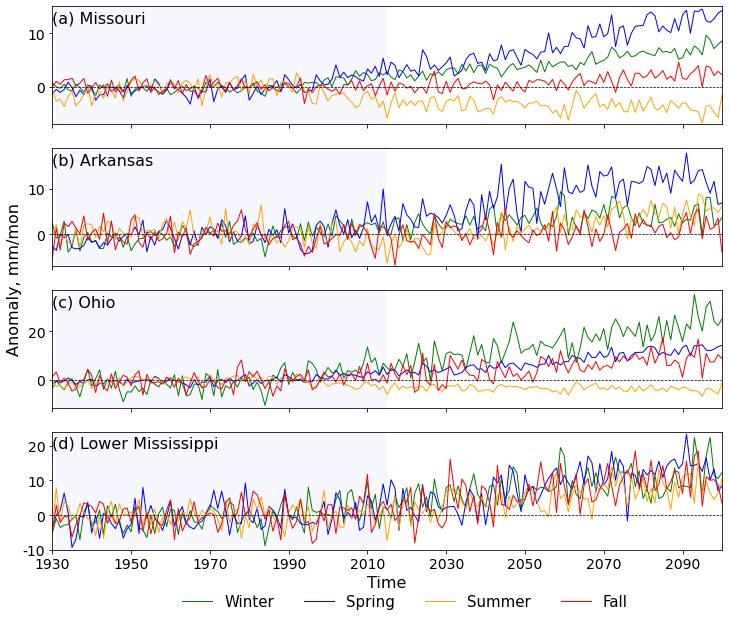

In [71]:
#%matplotlib notebook


tickFontSize = 14
textFontSize = 16
legendFontSize = 15
titleFontSize = 16

linewidth = 0.8
dashLinewidth = 0.7

#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

fig = plt.figure(figsize=(12, 10), constrained_layout=False)
axs = [plt.subplot(4, 1, x + 1,) for x in range(4)]

ax1 = axs[0]
ln12=ax1.plot(range(171), param_winterAnom_Missouri, label="Winter", color = 'green', linestyle='-', linewidth=1.0)
ln13=ax1.plot(range(171), param_springAnom_Missouri, label="Spring", color = 'blue', linestyle='-', linewidth=1.0)
ln14=ax1.plot(range(171), param_summerAnom_Missouri, label="Summer", color = 'orange', linestyle='-', linewidth=1.0)
ln15=ax1.plot(range(171), param_fallAnom_Missouri, label="Fall", color = 'red', linestyle='-', linewidth=1.0)
ln16=ax1.axhline(y = 0, color = 'k', label = '', linestyle='--', linewidth=0.7)

ln17=ax1.axvspan(1, 84.5, color='b',alpha=0.03)

ax1.set_title('(a) Missouri', y= 0.98, pad=-14, fontsize = textFontSize, loc='left')

ax1.xaxis.set_major_formatter(plt.FixedFormatter(yMD))
ax1.set_xticks(timeTicks)
ax1.set_xticklabels('', )

ax1.set_xlim([0, 170])
ax1.set_ylim([-7, 15])
ax1.set_yticks([0, 10]) 
ax1.set_yticklabels(['0', '10'],  fontsize = tickFontSize) 
#+++++++++++++++++++++++++++++++++++++

ax2 = axs[1]
ln22=ax2.plot(range(171), param_winterAnom_Arkansas, label="Winter", color = 'green', linestyle='-', linewidth=1.0)
ln23=ax2.plot(range(171), param_springAnom_Arkansas, label="Spring", color = 'blue', linestyle='-', linewidth=1.0)
ln24=ax2.plot(range(171), param_summerAnom_Arkansas, label="Summer", color = 'orange', linestyle='-', linewidth=1.0)
ln25=ax2.plot(range(171), param_fallAnom_Arkansas, label="Fall", color = 'red', linestyle='-', linewidth=1.0)
ln26=ax2.axhline(y = 0, color = 'k', label = '', linestyle='--', linewidth=0.7)
ln27=ax2.axvspan(1, 84.5, color='b',alpha=0.03)

ax2.set_title('(b) Arkansas', y=0.98, pad=-14, fontsize = textFontSize, loc='left')
ax2.xaxis.set_major_formatter(plt.FixedFormatter(yMD))
ax2.set_xticks(timeTicks)
ax2.set_xticklabels('', )

ax2.set_xlim([0, 170])
ax2.set_ylim([-7, 19])
ax2.set_yticks([0, 10]) 
ax2.set_yticklabels(['0', '10'],  fontsize = tickFontSize) 

ax2.set_ylabel('Anomaly, mm/mon', fontsize = textFontSize)
ax2.yaxis.set_label_coords(-.045, -.1)
#+++++++++++++++++++++++++++++++++++++
#+++++++++++++++++++++++++++++++++++++

ax3 = axs[2]
ln32=ax3.plot(range(171), param_winterAnom_Ohio, label="Winter", color = 'green', linestyle='-', linewidth=1.0)
ln33=ax3.plot(range(171), param_springAnom_Ohio, label="Spring", color = 'blue', linestyle='-', linewidth=1.0)
ln34=ax3.plot(range(171), param_summerAnom_Ohio, label="Summer", color = 'orange', linestyle='-', linewidth=1.0)
ln35=ax3.plot(range(171), param_fallAnom_Ohio, label="Fall", color = 'red', linestyle='-', linewidth=1.0)
ln36=ax3.axhline(y = 0, color = 'k', label = '', linestyle='--', linewidth=0.7)
ln37=ax3.axvspan(1, 84.5, color='b',alpha=0.03)

ax3.set_title('(c) Ohio', y=0.98, pad=-14, fontsize = textFontSize, loc='left')
ax3.xaxis.set_major_formatter(plt.FixedFormatter(yMD))
ax3.set_xticks(timeTicks)
ax3.set_xticklabels('', )

ax3.set_xlim([0, 170])
ax3.set_ylim([-11.5, 37])
ax3.set_yticks([0, 20]) 
ax3.set_yticklabels(['0', '20'],  fontsize = tickFontSize) 
ax3.legend(ncol=4, loc=(+0.185, -1.75),frameon=False, fontsize=legendFontSize)

#+++++++++++++++++++++++++++++++++++++
#+++++++++++++++++++++++++++++++++++++

ax4 = axs[3]
ln42=ax4.plot(range(171), param_winterAnom_lowMissi, label="Winter", color = 'green', linestyle='-', linewidth=1.0)
ln43=ax4.plot(range(171), param_springAnom_lowMissi, label="Spring", color = 'blue', linestyle='-', linewidth=1.0)
ln44=ax4.plot(range(171), param_summerAnom_lowMissi, label="Summer", color = 'orange', linestyle='-', linewidth=1.0)
ln45=ax4.plot(range(171), param_fallAnom_lowMissi, label="Fall", color = 'red', linestyle='-', linewidth=1.0)
ln46=ax4.axhline(y = 0, color = 'k', label = '', linestyle='--', linewidth=0.7)
ln47=ax4.axvspan(1, 84.5, color='b',alpha=0.03)

ax4.set_title('(d) Lower Mississippi', y=0.98, pad=-14, fontsize = textFontSize, loc='left')

ax4.xaxis.set_major_formatter(plt.FixedFormatter(yMD))
ax4.set_xticks(timeTicks)
ax4.set_xticklabels(timeTickLebels, minor=False, rotation=0, fontsize = tickFontSize)
ax4.set_xlim([0, 170])
ax4.set_ylim([-10, 24])
ax4.set_yticks([-10, 0, 10, 20]) 
ax4.set_yticklabels(['-10', '0', '10', '20'],  fontsize = tickFontSize) 
ax4.set_xlabel('Time', fontsize = textFontSize)

#+++++++++++++++++++++++++++++++++++++
#+++++++++++++++++++++++++++++++++++++

plt.show()


#plt.savefig(r'C:\rezaul\1.academic\1.research\2.project\mrb\output\fig\paperOne\param\precip\seasonal\precipSeasonalAnomTs.pdf') 
#plt.savefig(r'C:\rezaul\1.academic\1.research\2.project\mrb\output\fig\paperOne\param\precip\seasonal\precipSeasonalAnomTs.png', dpi=600)  


In [72]:
STOP here =============

SyntaxError: invalid syntax (<ipython-input-72-68e495d02f0f>, line 1)